In [1]:
import pandas as pd 
from sklearn import tree
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import math as m
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import average_precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.svm import SVC

from sklearn.ensemble import  ExtraTreesClassifier


In [7]:
t = pd.read_csv(r'C:\Users\ILYA\Downloads\train.csv')

In [8]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# plt.figure(figsize=(8, 5))
# sns.set_style('whitegrid')
# sns.countplot(x = 'Sex',hue='Survived',data=train_data,palette='rainbow')

In [13]:
X = t.drop(['Ticket', 'Survived', 'PassengerId'], axis = 1)
X = X.fillna({'Age' : t.Age.median()})
X['Age_Category'] = pd.cut(X['Age'], bins=[0, 16, 32, 48, 64, 80], labels=['1','2','3','4','5'])
#X.Age_Category = pd.to_numeric(X.Age_Category)

X['Fare_Category'] =pd.cut(X['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['0', '1', '2', '3'])
#X.Fare_Category = pd.to_numeric(X.Fare_Category)
#X = X.fillna({'Fare_Category' : X.Fare_Category.median()})

X.Cabin = X.Cabin.astype(str).apply(lambda x: x[0])

X['Family'] = X.Parch + X.SibSp


X['is_alone'] = X.Family.apply(lambda x: 1 if x>0 else 0)

#X.Embarked = X.Embarked.apply(lambda x: 1 if x=='S' else 0)

X = X.drop(['SibSp', 'Parch', 'Fare', 'Age'], axis=1)

X.Sex = X.Sex.apply(lambda x: 1 if x == 'male' else 0)
#X.is_alone = X.is_alone.apply(lambda x: 0 if x == 'True' else 1)



X['title']=X.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}
X['title']=X.title.map(newtitles)
X = X.drop(['Name'], axis=1)


X.Family = X.Family.astype(str)
X.Pclass = X.Pclass.astype(str)
X = pd.get_dummies(X)
#X = X.drop(['title_Royalty'], axis =1)




#X['SibSp'] = t.SibSp
#X['Parch'] = t.Parch
X = X.drop(['title_Royalty', 'Cabin_F', 'Cabin_G', 'Family_7', 'Family_6', 'Cabin_T', 'Age_Category_5', 'Family_10', 'Family_4', 'title_Officer', 'Cabin_C', 'Cabin_A', 'Family_5', 'Age_Category_4', 'Cabin_D', 'title_Master', 'Embarked_Q', 'Fare_Category_1',
'Fare_Category_0', 'Family_3', 'Age_Category_3', 'Cabin_E', 'Age_Category_1', 'Cabin_B', 'Family_1', 'Family_2','Fare_Category_2',
'Age_Category_2', 'Family_0'
], axis =1)

In [14]:
X

,Sex,is_alone,Pclass_1,Pclass_2,Pclass_3,Cabin_n,Embarked_C,Embarked_S,Fare_Category_3,title_Miss,title_Mr,title_Mrs
0,1,1,0,0,1,1,0,1,0,0,1,0
1,0,1,1,0,0,0,1,0,1,0,0,1
2,0,0,0,0,1,1,0,1,0,1,0,0
3,0,1,1,0,0,0,0,1,1,0,0,1
4,1,0,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,0,1,0,1,0,1,0,0,0,0
887,0,0,1,0,0,0,0,1,0,1,0,0
888,0,1,0,0,1,1,0,1,0,1,0,0
889,1,0,1,0,0,0,1,0,0,0,1,0


In [730]:
y = t.Survived

In [731]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [732]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [733]:
X_test

,Sex,is_alone,Pclass_1,Pclass_2,Pclass_3,Cabin_n,Embarked_C,Embarked_S,Fare_Category_3,title_Miss,title_Mr,title_Mrs
709,1,1,0,0,1,1,1,0,0,0,0,0
439,1,0,0,1,0,1,0,1,0,0,1,0
840,1,0,0,0,1,1,0,1,0,0,1,0
720,0,1,0,1,0,1,0,1,1,1,0,0
39,0,1,0,0,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,0,0,0,1,0,0,1,0,0,1,0
525,1,0,0,0,1,1,0,0,0,0,1,0
381,0,1,0,0,1,1,1,0,0,1,0,0
140,0,1,0,0,1,1,1,0,0,0,0,1


In [734]:
#Строим дерево 
tree1 = RandomForestClassifier()

In [735]:
parameters = {'criterion': ['gini'],
             'n_estimators' : range(60, 70),
             'max_depth': range(8 ,30, 2),
             'min_samples_split': range(10, 30, 2),
             'min_samples_leaf': range(5, 10)
             }


In [736]:
best_srch = GridSearchCV(tree1, parameters, cv=3, n_jobs=-1)

In [737]:
best_srch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(8, 30, 2),
                         'min_samples_leaf': range(5, 10),
                         'min_samples_split': range(10, 30, 2),
                         'n_estimators': range(60, 70)})

In [738]:
best_srch.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'min_samples_leaf': 5,
 'min_samples_split': 14,
 'n_estimators': 64}

In [739]:
a = best_srch.best_estimator_.feature_importances_

In [740]:
feature_importances = pd.DataFrame({'feature': list(X_train), 
                                    "ranking": a})

feature_importances.sort_values('ranking', ascending=False)

,feature,ranking
10,title_Mr,0.265197
0,Sex,0.239020
4,Pclass_3,0.087663
5,Cabin_n,0.080668
11,title_Mrs,0.080313
3,Pclass_2,0.050831
9,title_Miss,0.048967
2,Pclass_1,0.040148
7,Embarked_S,0.033188
8,Fare_Category_3,0.025740


In [741]:
best_tree = RandomForestClassifier(criterion ='gini', max_depth=16, min_samples_leaf=5, min_samples_split=14, n_estimators=64, n_jobs=-1)

# criterion='gini',
# n_estimators=1040,
# min_samples_split=25,
# min_samples_leaf=4,
# max_depth=50,
# oob_score=True,
# random_state=1,
# n_jobs=-1
# )
    
   # criterion ='entropy', max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=48, n_jobs=-1)


In [742]:
#2382 /0,78708 -RandomForestClassifier(criterion ='gini', max_depth=20, min_samples_leaf=5, min_samples_split=20, n_estimators=41, n_jobs=-1)

#    /0,77751  -RandomForestClassifier(criterion='gini', max_depth=16, min_samples_leaf=3, min_samples_split=8, n_estimators= 65)

#3838/0,78229 - RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=40, n_jobs=-1)

#4667/0,7799 - RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=30, n_jobs=-1) 
#RandomForestClassifier(max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=30, n_jobs=-1)

In [743]:
best_tree.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=5, min_samples_split=14,
                       n_estimators=64, n_jobs=-1)

In [744]:
y_test_pred = best_tree.predict(X_test)

In [745]:
# '\nclassification report'
# classification_report(y_test, y_test_pred)


In [746]:
best_tree.score(X_train, y_train)
#    /0,7535 == 0,871
#3838/0,78229 == 0,899

0.8288590604026845

In [747]:
best_tree.score(X_test, y_test)
#    /0,7535 == 0,806
#3838/0,78229 = 0,796

0.8067796610169492

In [748]:
precision_score(y_test, y_test_pred, average='micro')
#    /0,7535 == 0.805
#3838/0,78229 == 0,8125
#4667/0,7799 == 0,831

0.8067796610169492

In [749]:
recall_score(y_test, y_test_pred)
#    /0,7535 == 0.691
#3838/0,78229 == 0,65 
#4667/ 0,7799 == 0,7

0.675

In [750]:
accuracy_score(y_test, y_test_pred)

0.8067796610169492

<AxesSubplot:>

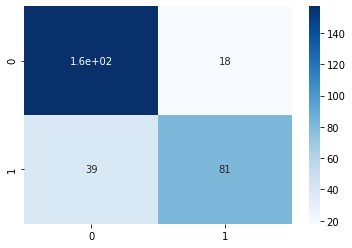

In [751]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap="Blues")

In [350]:
# from sklearn.metrics import roc_curve, auc
# y_predicted_proba = logreg.predict_proba(X_test)

# #fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# fpr, tpr, thresholds = roc_curve(np.array(y_test_pred), np.array(y_predicted_proba[:,1]), pos_label=1)

# roc_auc= auc(fpr, tpr)
# lw =2
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [991]:
##DecisionTreeClas

In [2902]:
DecTr = tree.DecisionTreeClassifier()

In [993]:
DEC_parameters = {'criterion': ['entropy', 'gini'],
             'max_depth': range(24, 100, 2),
             'min_samples_split': range(30, 100, 2),
             'min_samples_leaf': range(2, 10, 2)
             }

In [994]:
DEC_b_search = GridSearchCV(DecTr, DEC_parameters, cv=5, n_jobs=-1)

In [995]:
DEC_b_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(24, 100, 2),
                         'min_samples_leaf': range(2, 10, 2),
                         'min_samples_split': range(30, 100, 2)})

In [996]:
DEC_b_search.best_params_

{'criterion': 'entropy',
 'max_depth': 24,
 'min_samples_leaf': 2,
 'min_samples_split': 42}

In [225]:
DEC_best_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_leaf=5, min_samples_split=12)


In [226]:
DEC_best_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_leaf=5,
                       min_samples_split=12)

In [227]:
DEC_pred_y = DEC_best_tree.predict(X_test)

In [228]:
DEC_prec = precision_score(y_test, DEC_pred_y)
DEC_prec

0.8137254901960784

In [229]:
DEC_recall = recall_score(y_test, DEC_pred_y)
DEC_recall

0.6916666666666667

<AxesSubplot:>

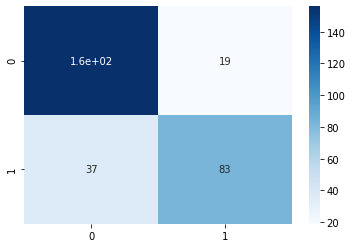

In [230]:
sns.heatmap(confusion_matrix(y_test, DEC_pred_y), annot=True, cmap="Blues")

In [ ]:
#Логистическая регрессия

In [ ]:
#Логистическая регрессия

In [771]:
logreg = LogisticRegression(random_state=789)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=789)

In [772]:
log_y_predicted = logreg.predict(X_test)
log_y_predicted

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [773]:
log_precisiion = precision_score(y_test, log_y_predicted)
log_precisiion

0.7456140350877193

In [774]:
log_recall = recall_score(y_test, log_y_predicted)
log_recall

0.7083333333333334

In [775]:
logist_accuracy_score = accuracy_score(y_test, log_y_predicted)
logist_accuracy_score

0.7830508474576271

<AxesSubplot:>

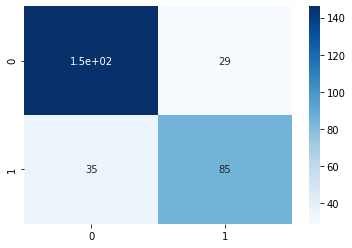

In [776]:
sns.heatmap(confusion_matrix(y_test, log_y_predicted), annot=True, cmap="Blues")

In [ ]:
#METHOD SVC

In [986]:
# lambd = 0.3
# gamma = 0.1
# candidate_classifier = SVC(probability=True, C=1/lambd, gamma=gamma) 

In [807]:
lambd = 0.3
gamma = 0.1
#svc = SVC(probability=True, C=1/lambd, gamma=gamma) 
svc = SVC(C=1)
svc.fit(X_train, y_train)

SVC(C=1)

In [808]:
SVC_y_pred = svc.predict(X_test)
SVC_y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [809]:
SVC_prec=precision_score(y_test, SVC_y_pred)
SVC_prec

0.7938144329896907

In [810]:
SVC_rec = recall_score(y_test, SVC_y_pred)
SVC_rec

0.6416666666666667

In [811]:
svc.score(X_test, y_test)

0.7864406779661017

<AxesSubplot:>

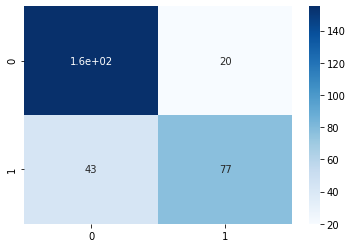

In [812]:
sns.heatmap(confusion_matrix(y_test, SVC_y_pred), annot=True, cmap="Blues")

In [756]:
#PREDICTION FOT KAGGLE

In [757]:
t1 = pd.read_csv(r'D:\Загрузки\test.csv')

In [758]:
t1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [759]:
X1 = t1.drop(['Ticket', 'PassengerId'], axis = 1)
X1 = X1.fillna({'Age' : t1.Age.median()})
X1['Age_Category'] = pd.cut(X1['Age'], bins=[0, 16, 32, 48, 64, 80], labels=['1','2','3','4','5'])
#X.Age_Category = pd.to_numeric(X.Age_Category)

X1['Fare_Category'] =pd.cut(X1['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['0', '1', '2', '3'])
#X.Fare_Category = pd.to_numeric(X.Fare_Category)
#X = X.fillna({'Fare_Category' : X.Fare_Category.median()})

X1.Cabin = X1.Cabin.astype(str).apply(lambda x: x[0])

X1['Family'] = X1.Parch + X1.SibSp


X1['is_alone'] = X1.Family.apply(lambda x: 1 if x>0 else 0)

#X.Embarked = X.Embarked.apply(lambda x: 1 if x=='S' else 0)

X1 = X1.drop(['SibSp', 'Parch', 'Fare', 'Age'], axis=1)

X1.Sex = X1.Sex.apply(lambda x: 1 if x == 'male' else 0)
#X.is_alone = X.is_alone.apply(lambda x: 0 if x == 'True' else 1)



X1['title']=X1.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}
X1['title']=X1.title.map(newtitles)
X1 = X1.drop(['Name'], axis=1)


X1.Family = X1.Family.astype(str)
X1.Pclass = X1.Pclass.astype(str)
X1 = pd.get_dummies(X1)
#X = X.drop(['title_Royalty'], axis =1)




#X['SibSp'] = t.SibSp
#X['Parch'] = t.Parch
X1 = X1.drop(['title_Royalty', 'Cabin_F', 'Cabin_G', 'Family_7', 'Family_6', 'Age_Category_5', 'Family_10', 'Family_4', 'title_Officer', 'Cabin_C', 'Cabin_A', 'Family_5', 'Age_Category_4', 'Cabin_D', 'title_Master', 'Embarked_Q', 'Fare_Category_1',
'Fare_Category_0', 'Family_3', 'Age_Category_3', 'Cabin_E', 'Age_Category_1', 'Cabin_B', 'Family_1', 'Family_2','Fare_Category_2',
'Age_Category_2', 'Family_0'

], axis =1)

In [760]:
X1

,Sex,is_alone,Pclass_1,Pclass_2,Pclass_3,Cabin_n,Embarked_C,Embarked_S,Fare_Category_3,title_Miss,title_Mr,title_Mrs
0,1,0,0,0,1,1,0,0,0,0,1,0
1,0,1,0,0,1,1,0,1,0,0,0,1
2,1,0,0,1,0,1,0,0,0,0,1,0
3,1,0,0,0,1,1,0,1,0,0,1,0
4,0,1,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0,0,0,1,1,0,1,0,0,1,0
414,0,0,1,0,0,0,1,0,1,0,0,0
415,1,0,0,0,1,1,0,1,0,0,1,0
416,1,0,0,0,1,1,0,1,0,0,1,0


In [761]:
surv_pred = best_tree.predict(X1)

In [762]:
surv_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [763]:
surv_dat = pd.DataFrame({'Survived': surv_pred})

In [764]:
surv_dat

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [765]:
ID_pas = t1.PassengerId

In [766]:
ID_pas = pd.DataFrame({'PassengerId': ID_pas})

In [767]:
ID_pas['Survived'] = surv_dat

In [768]:
ItogSurvive = ID_pas.set_index('PassengerId')

In [769]:
ItogSurvive

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [770]:
ItogSurvive.to_csv('Try40_titanic.csv')